In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
from anomaly.utils import specobjid_to_idx

In [15]:
# load data
bin_id = "bin_03"
home_directory = "/home/edgar"
data_directory = (
    f"{home_directory}/spectra/0_01_z_0_5_4_0_snr_inf/"
)

spectra = np.load(f"{data_directory}/spectra.npy", mmap_mode="r")
specobjid_map = np.load(
    f"{data_directory}/{bin_id}/{bin_id}_index_specobjid.npy"
)
wave = np.load(f"{data_directory}/wave.npy")

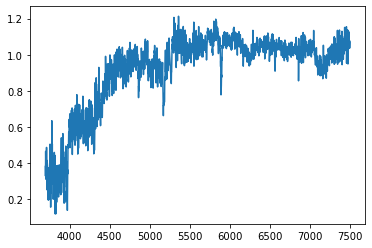

In [16]:
idx_spectrum = specobjid_map[10000, 0]
plt.plot(wave, spectra[idx_spectrum])

In [17]:
# load top normal
top_normal_df = pd.read_csv(
    (f"/home/edgar/Downloads/bin_04/"
        f"explanation/256_128_64/latent_12/mse_noRel100/"
        "top_normal.csv.gz"
    ),
    index_col="specobjid"
)

In [18]:
top_normal_df["score"]

specobjid
887350453061314560     0.000126
3109855465517901824    0.000129
443715646065240064     0.000130
443765948722210816     0.000134
2844072719580948480    0.000134
                         ...   
3343996467592325120    0.000180
997665280031221760     0.000180
1560507218766358528    0.000180
399815443205875712     0.000180
603628344193345536     0.000181
Name: score, Length: 100, dtype: float64

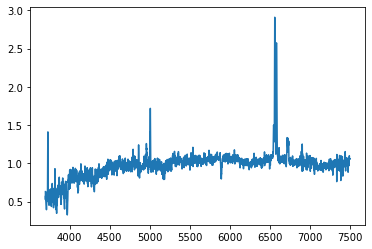

In [19]:
# objid = top_normal_df.index.to_numpy()[-3]
for objid in top_normal_df.index.to_numpy():
    
    idx_spectrum = specobjid_to_idx(objid, specobjid_map)
    spectrum = spectra[idx_spectrum]
    plt.clf()
    plt.plot(wave, spectrum)
    plt.savefig(f"/home/edgar/Downloads/mederic/{objid}.pdf")

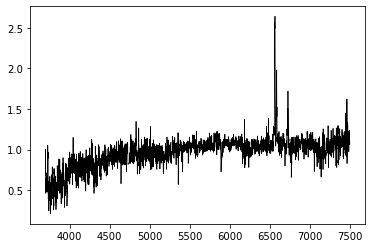

In [24]:
for idx in np.random.randint(0, spectra.shape[0], size=1000):

    plt.clf()
    plt.plot(wave, spectra[idx], color="black", linewidth=0.75)
    plt.savefig(f"/home/edgar/Downloads/mederic/{idx:04d}.pdf")

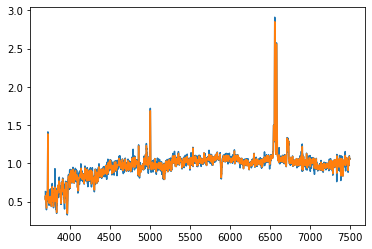

In [31]:
from scipy.signal import medfilt
tata = medfilt(spectrum, 3)
plt.plot(wave, spectrum)
plt.plot(wave, tata)

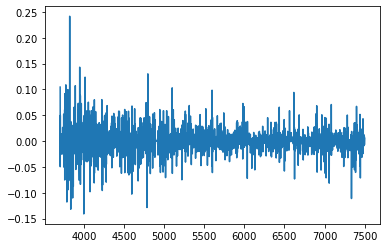

In [32]:
plt.plot(wave, spectrum-tata)

In [33]:
# medfilt?

Signature: medfilt(volume, kernel_size=None)
Docstring:
Perform a median filter on an N-dimensional array.

Apply a median filter to the input array using a local window-size
given by `kernel_size`. The array will automatically be zero-padded.

Parameters
----------
volume : array_like
    An N-dimensional input array.
kernel_size : array_like, optional
    A scalar or an N-length list giving the size of the median filter
    window in each dimension.  Elements of `kernel_size` should be odd.
    If `kernel_size` is a scalar, then this scalar is used as the size in
    each dimension. Default size is 3 for each dimension.

Returns
-------
out : ndarray
    An array the same size as input containing the median filtered
    result.

Warns
-----
UserWarning
    If array size is smaller than kernel size along any dimension

See Also
--------
scipy.ndimage.median_filter
scipy.signal.medfilt2d

Notes
-----
The more general function `scipy.ndimage.median_filter` has a more
efficient implement